# **Business Understanding**

Understand the temperature trends in New Delhi over the years.

Identify patterns in humidity, cloud cover, and other meteorological factors.

Highlight any anomalies or extreme weather events.

Provide insights that can be used for future weather predictions and planning.


# **Data Understanding**

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/neeharikasinghsjsu/cmpe255assignments/main/DataPreparationAssignment/datasets/Indian_summers.csv', encoding='ISO-8859-1')
data
data.columns


Index(['City', 'Date', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description'],
      dtype='object')

In [ ]:
# General Overview of the dataset

# Shape of the dataset
shape = data.shape

# Data types of each column
data_types = data.dtypes

# Number of unique values in each column
unique_values = data.nunique()

shape, data_types, unique_values


((13650, 20),
 City                 object
 Date                 object
 tempmax             float64
 tempmin             float64
 temp                float64
 feelslikemax        float64
 feelslikemin        float64
 feelslike           float64
 dew                 float64
 humidity            float64
 windspeed           float64
 winddir             float64
 sealevelpressure    float64
 cloudcover          float64
 visibility          float64
 sunrise              object
 sunset               object
 moonphase           float64
 conditions           object
 description          object
 dtype: object,
 City                   15
 Date                  910
 tempmax               220
 tempmin               194
 temp                  188
 feelslikemax          321
 feelslikemin          253
 feelslike             265
 dew                   317
 humidity             6100
 windspeed             384
 winddir              2490
 sealevelpressure      260
 cloudcover            977
 visibility 

Shape: The dataset contains 13,650 entries with 20 columns.

Data Types:

Objects (String): City, Date, Sunrise, Sunset, Conditions, Description
Float64: All other columns including temperature data, humidity, wind speed, etc.
Unique Values:

The dataset covers 15 cities.
There are 910 unique dates, which suggests that we have data for multiple cities on the same days.
Weather conditions have 6 unique values.
Weather description has 31 unique values.

In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values


City                   0
Date                   0
tempmax               35
tempmin               35
temp                  45
feelslikemax          36
feelslikemin          36
feelslike             46
dew                   45
humidity              45
windspeed             45
winddir               50
sealevelpressure    3019
cloudcover            45
visibility            45
sunrise                0
sunset                 0
moonphase              0
conditions            45
description           45
dtype: int64

The dataset has missing values in several columns:

Temperature-related columns (tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike): 35-46 missing values.
Dew, Humidity, Windspeed, Winddir, Cloudcover, Visibility: 45-50 missing values.
Sea Level Pressure: 3,019 missing values.
Conditions and Description: 45 missing values each.

In [ ]:
# Generate descriptive statistics for numerical features
descriptive_stats = data.describe()

descriptive_stats


,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
count,13615.000000,13615.000000,13605.000000,13614.000000,13614.000000,13604.000000,13605.000000,13605.000000,13605.000000,13600.000000,10631.000000,13605.000000,13605.000000,13650.000000
mean,36.728248,25.821160,31.151510,40.212605,27.221324,33.704535,19.049607,54.638537,20.078552,205.236559,1004.302446,37.120235,4.666645,0.500692
std,4.115452,3.212167,3.074874,5.389016,4.907125,4.666616,5.966341,19.521510,9.886468,64.181345,4.183785,24.684504,1.382413,0.308204
min,0.000000,0.000000,19.900000,0.000000,0.000000,19.900000,-10.300000,7.410000,0.000000,0.000000,908.500000,0.000000,1.300000,0.000000
25%,34.000000,23.700000,29.200000,36.500000,23.700000,30.200000,15.000000,38.190000,14.800000,159.800000,1001.600000,16.700000,3.700000,0.250000
50%,37.000000,26.000000,31.100000,40.000000,26.000000,33.500000,20.300000,56.120000,19.500000,218.300000,1004.700000,36.700000,4.300000,0.500000
75%,39.800000,28.100000,33.200000,43.700000,31.100000,37.200000,24.000000,71.410000,24.100000,258.625000,1007.300000,54.000000,5.600000,0.760000
max,50.000000,37.000000,40.500000,79.200000,43.300000,48.500000,29.100000,99.040000,263.200000,360.000000,1026.200000,100.000000,12.300000,1.000000


Temperature:

The average maximum temperature (tempmax) across all cities and days is approximately 36.7 deg C, with the highest recorded temperature being
50 deg C

The average minimum temperature (tempmin) is approximately 25.8 C
with the lowest recorded temperature being 0C. This seems to be an anomaly as it's unlikely to have such a low temperature in Indian summers.

The feelslike temperatures show that sometimes the perceived temperature can be significantly different from the actual temperature, reaching as high as
79.2

Humidity:
The average humidity is about 54.64%, with a minimum of 7.41% and a maximum of 99.04%.

Wind:
The average wind speed is about 20.08 km/h, but it has reached speeds as high as 263.2 km/h, which seems unusual and might be a data anomaly.
Wind direction varies across all directions with values between
0
∘
0
∘
  (North) to
36
0
∘
360
∘
  (North again, completing the circle).
Sea Level Pressure:

The average sea-level pressure is approximately 1004.3 hPa. The minimum value is 908.5, which seems exceptionally low and might need further investigation.
Cloud Cover and Visibility:

Cloud cover varies from completely clear skies (0%) to fully overcast (100%).
The average visibility is around 4.67 km.
Moon Phase:

Values range from 0 (New Moon) to 1 (Full Moon).

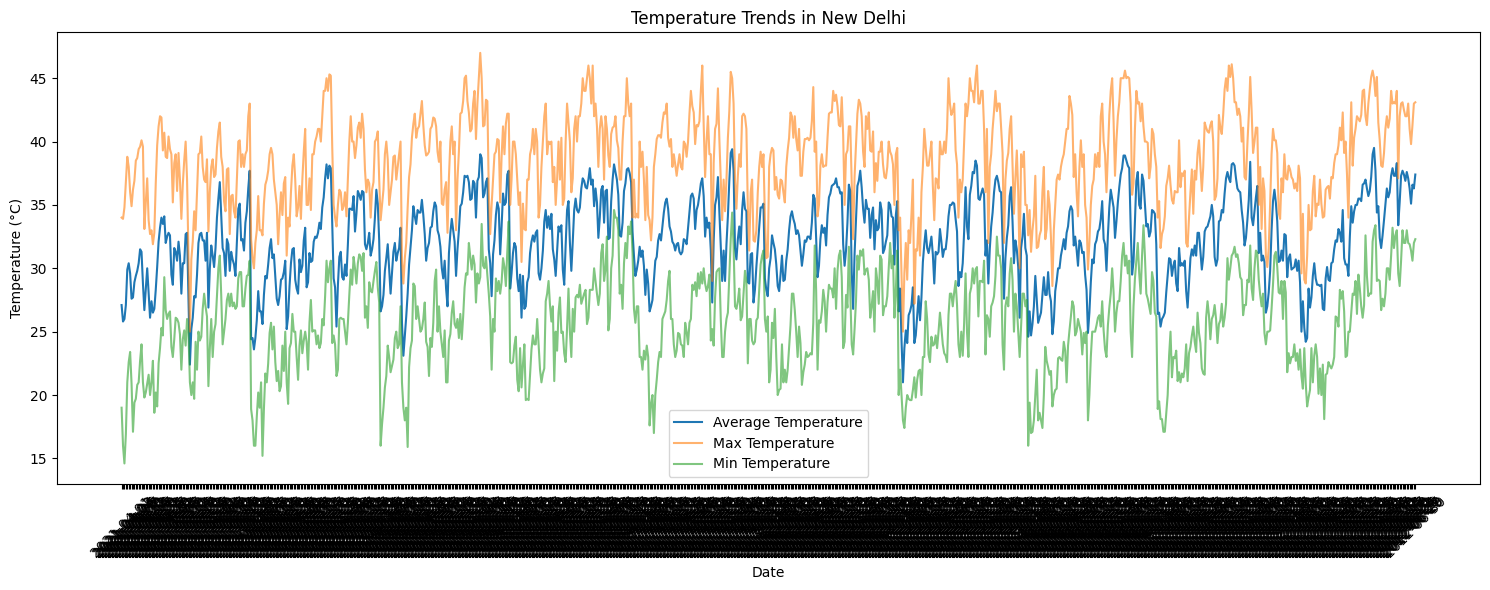

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for New Delhi
new_delhi_data = data[data['City'] == 'New Delhi']

# Plot average temperature trends for New Delhi over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='temp', data=new_delhi_data, label='Average Temperature')
sns.lineplot(x='Date', y='tempmax', data=new_delhi_data, label='Max Temperature', alpha=0.6)
sns.lineplot(x='Date', y='tempmin', data=new_delhi_data, label='Min Temperature', alpha=0.6)

plt.title('Temperature Trends in New Delhi')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


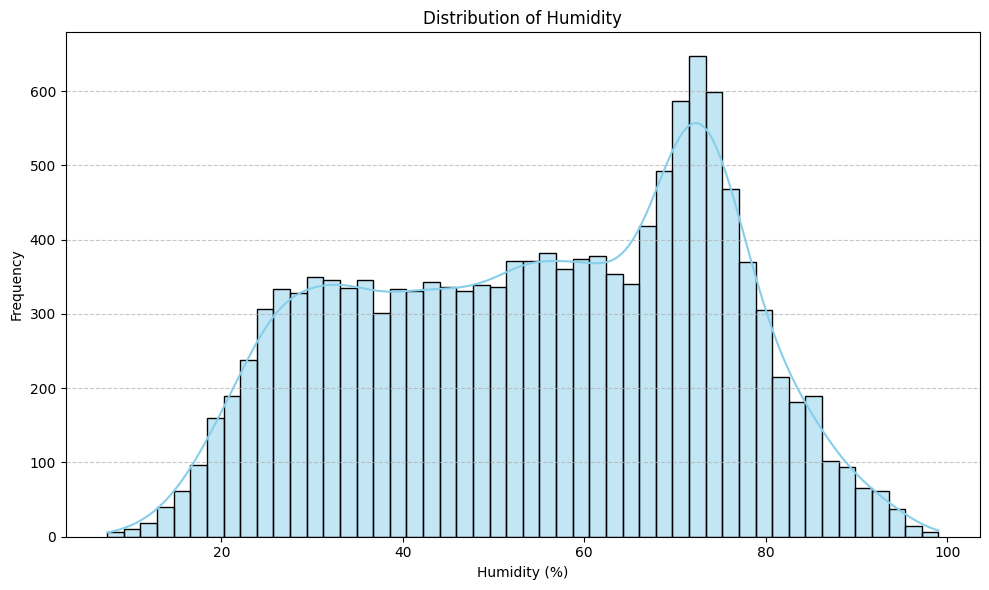

In [ ]:
# Plotting the distribution of humidity
plt.figure(figsize=(10, 6))
sns.histplot(data['humidity'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


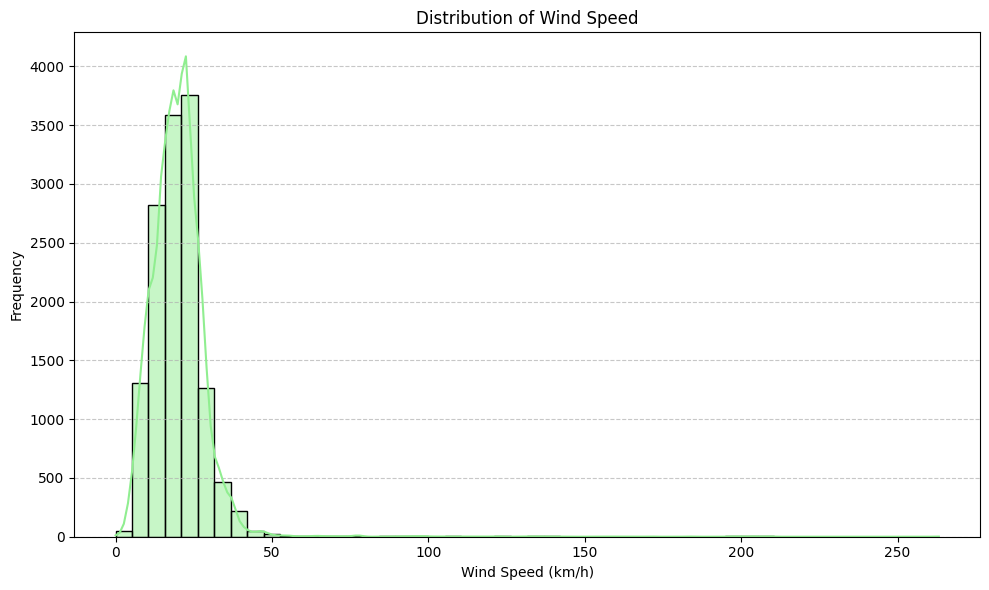

In [ ]:
# Plotting the distribution of wind speed
plt.figure(figsize=(10, 6))
sns.histplot(data['windspeed'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-61-b8841c1d2e41>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


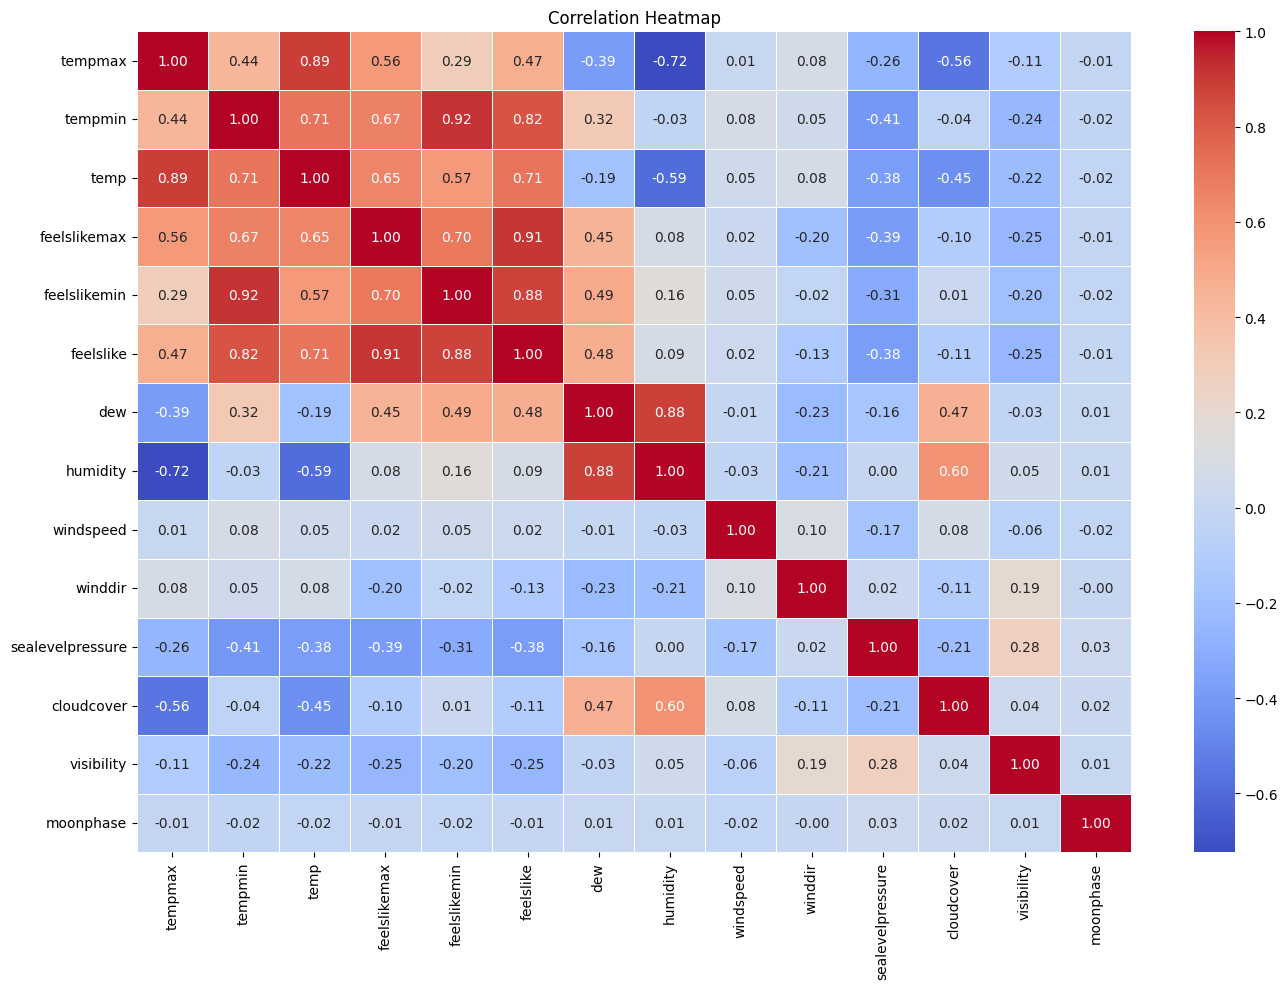

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


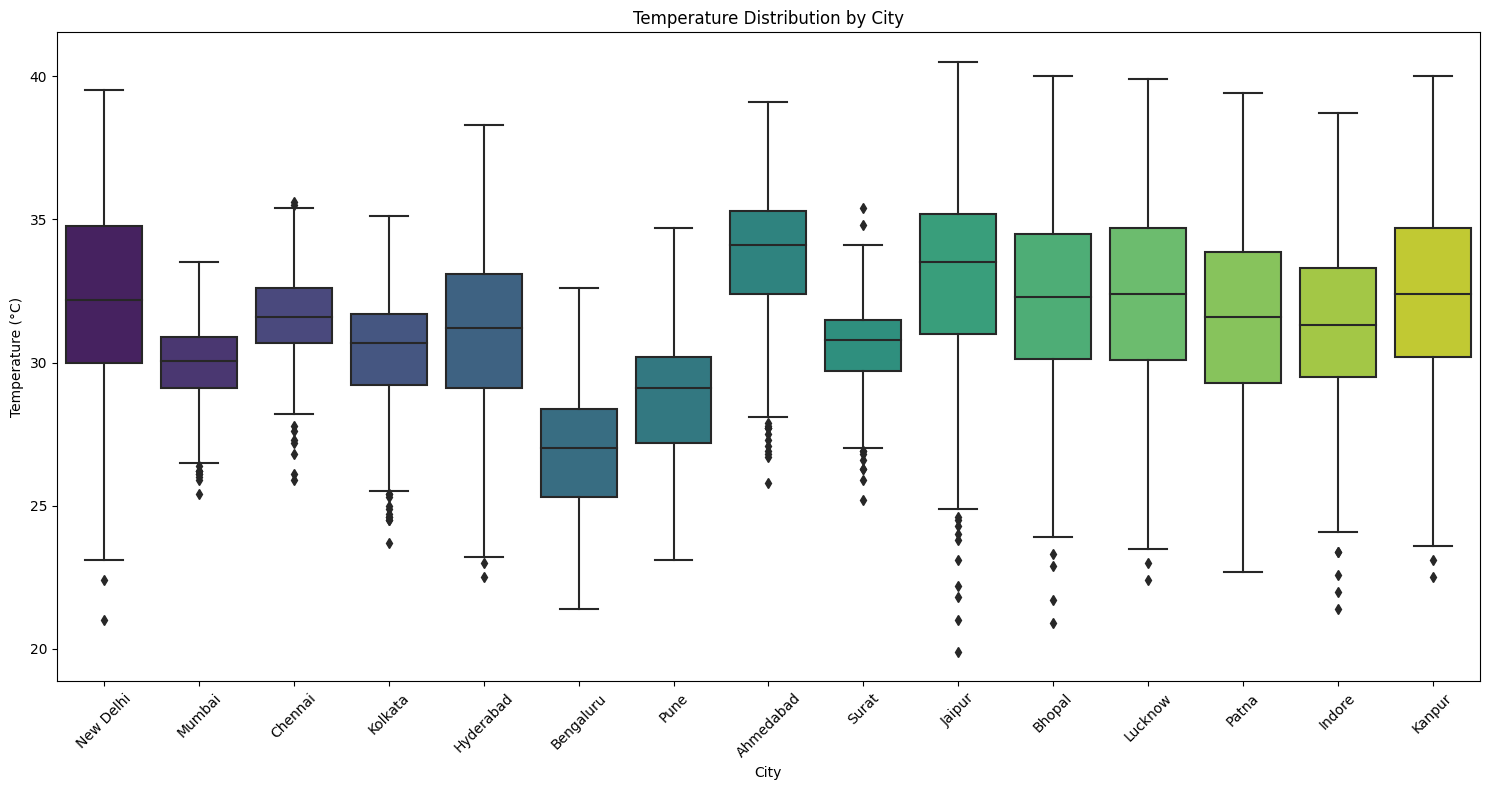

In [ ]:
# Plotting box plots for temperature distribution by city
plt.figure(figsize=(15, 8))
sns.boxplot(x='City', y='temp', data=data, palette='viridis')
plt.title('Temperature Distribution by City')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Data Preparation:**

In [ ]:
# Re-displaying the missing values
missing_values_percentage = (missing_values / len(data)) * 100

missing_values_percentage


City                 0.000000
Date                 0.000000
tempmax              0.256410
tempmin              0.256410
temp                 0.329670
feelslikemax         0.263736
feelslikemin         0.263736
feelslike            0.336996
dew                  0.329670
humidity             0.329670
windspeed            0.329670
winddir              0.366300
sealevelpressure    22.117216
cloudcover           0.329670
visibility           0.329670
sunrise              0.000000
sunset               0.000000
moonphase            0.000000
conditions           0.329670
description          0.329670
dtype: float64

In [ ]:
# Imputing missing values for columns with less than 0.5% missingness

# Numeric columns for median imputation
numeric_cols = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike',
                'dew', 'humidity', 'windspeed', 'winddir', 'cloudcover', 'visibility']

# Categorical columns for mode imputation
categorical_cols = ['conditions', 'description']

# Median imputation for numeric columns
for col in numeric_cols:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

# Mode imputation for categorical columns
for col in categorical_cols:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

# Check if imputation was successful and if there are any remaining missing values
remaining_missing_values = data.isnull().sum()

remaining_missing_values


City                   0
Date                   0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
windspeed              0
winddir                0
sealevelpressure    3019
cloudcover             0
visibility             0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
dtype: int64

In [ ]:
# Median imputation for the sealevelpressure column
median_sealevelpressure = data['sealevelpressure'].median()
data['sealevelpressure'].fillna(median_sealevelpressure, inplace=True)

# Check if there are any remaining missing values after imputation
final_missing_values = data.isnull().sum()

final_missing_values


City                0
Date                0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
dtype: int64

In [ ]:
# Columns for outlier detection
columns_to_check = ['temp', 'humidity', 'windspeed']

# Dictionary to store the number of potential outliers for each column
outliers_count = {}

# Identifying potential outliers using the IQR method
for col in columns_to_check:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers_count[col] = len(outliers)

outliers_count


{'temp': 72, 'humidity': 0, 'windspeed': 204}

In [ ]:
# Extracting only the time component from 'sunrise' and 'sunset' columns
data['sunrise'] = pd.to_datetime(data['sunrise']).dt.time
data['sunset'] = pd.to_datetime(data['sunset']).dt.time
# Convert the time components back to datetime for duration calculation
sunrise_dt = pd.to_datetime(data['sunrise'].astype(str))
sunset_dt = pd.to_datetime(data['sunset'].astype(str))

# Recalculate day-night duration in hours
data['day_duration'] = (sunset_dt - sunrise_dt).dt.total_seconds() / 3600

# Display the first few rows to check the adjustments and the newly computed day_duration
data[['Date', 'sunrise', 'sunset', 'day_duration']].head()



,Date,sunrise,sunset,day_duration
0,2021-04-01,06:11:12,18:39:13,12.466944
1,2021-04-02,06:10:04,18:39:46,12.495000
2,2021-04-03,06:08:55,18:40:19,12.523333
3,2021-04-04,06:07:47,18:40:53,12.551667
4,2021-04-05,06:06:39,18:41:26,12.579722


In [ ]:
data['month'] = pd.to_datetime(data['Date']).dt.month
data['year'] = pd.to_datetime(data['Date']).dt.year



In [ ]:
# Calculate temperature range for each day
data['temp_range'] = data['tempmax'] - data['tempmin']

# Display the first few rows to check the newly created features
data[['Date', 'month', 'year', 'temp_range']].head()

,Date,month,year,temp_range
0,2021-04-01,4,2021,15.0
1,2021-04-02,4,2021,17.9
2,2021-04-03,4,2021,20.2
3,2021-04-04,4,2021,19.9
4,2021-04-05,4,2021,17.8


# **Modeling**

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data.drop(columns=['City', 'Date', 'sunrise', 'sunset', 'conditions', 'description', 'temp'])
y = data['temp']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((10920, 17), (2730, 17))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, rmse, mae, r2


(0.21855376523771317,
 0.46749734249267466,
 0.33122152485678813,
 0.9770517407202417)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluating the model's performance
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

rf_mse, rf_rmse, rf_mae, rf_r2


(0.06538923992674028,
 0.25571319857750846,
 0.17499743589743658,
 0.9931340957209635)

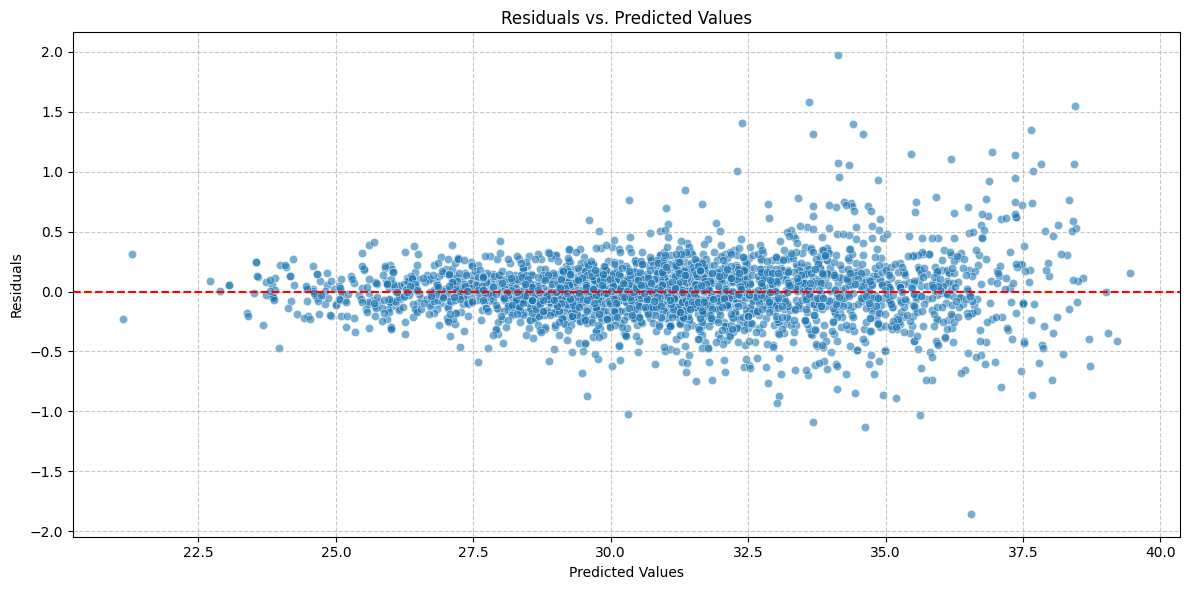

In [ ]:
# Calculating residuals
residuals = y_test - rf_y_pred

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(12, 6))
sns.scatterplot(x=rf_y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Evaluation**

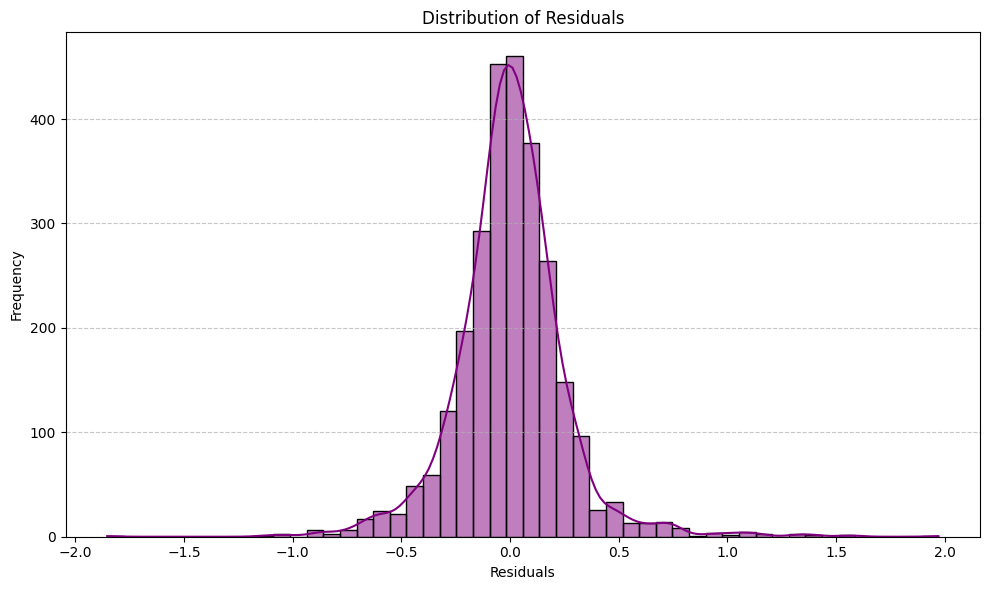

In [ ]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


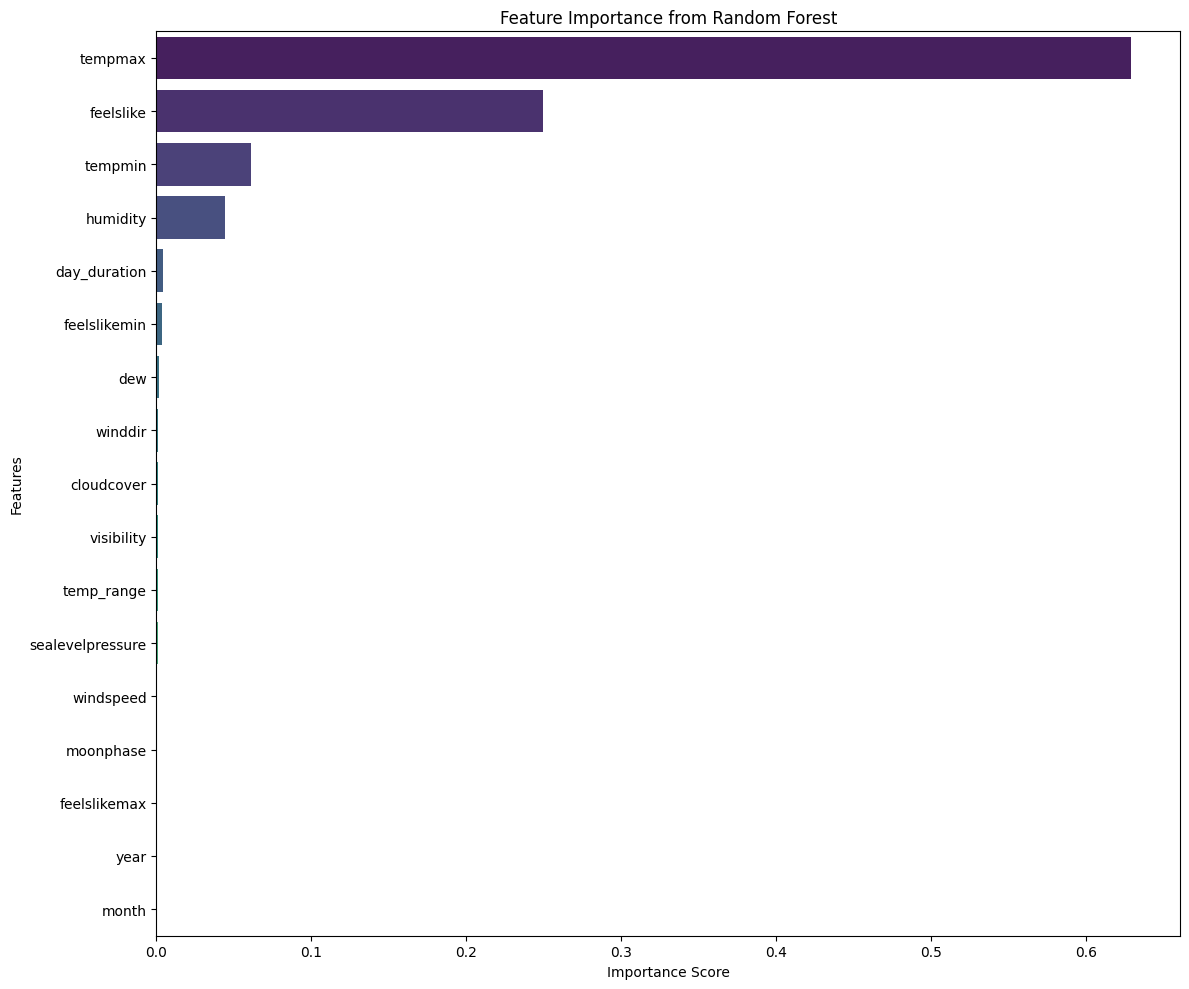

In [ ]:
# Extracting feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_
features = X_train.columns

# Creating a DataFrame for feature importances
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})

# Sorting the features based on importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
